In [24]:
import pandas as pd
import numpy as np 
import datetime 
from vega_datasets import data
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set()

#set figure size 
plt.rcParams['figure.figsize'] = (8,6)

#specify decimal places to display 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
#convert existing string value to a datetime type 
pd.to_datetime('Jan 1 1970')

In [ ]:
#what does this do 
try: 
    pd.to_datetime('Jan:1:1970')
except ValueError as e: 
    print('ValueError', e)

In [ ]:
#using pd.to_datetime to convert entire columns 
#set variable url equal to https
# set df equal to pd.read_csv and place 'url' inside the parenthesis 
#print dataframe datatypes 
#review the head of the dataframe 
url = "https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)
print(df.dtypes)
df.head()


In [ ]:
#convert our date column to datetime type 
#now 'date' feature has datatype 'datetime64'
df.date = pd.to_datetime(df.date)
df.dtypes

### Working with DateTime Series

In [ ]:
#extract each individual part of the date column and use it to create its own column 
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['weekday'] = df.date.dt.day_name()
df.head()

In [ ]:
#delete columns 
del df['year']
del df['day']
del df['month']
del df['weekday']

### Datetime Indexes

In [ ]:
#once we have a date-time column on a dataframe, we can use that column as the index on our dataframe 
#having a datetime index on our dataframe allows us to use a lot of time series specific functionality within pandas
df = df.set_index('date').sort_index()
df

In [ ]:
#look at the start of our data 
df.index.min()

In [ ]:
#look at the end of our data 
df.index.max()

In [ ]:
#with a datetime index we can access specific subsets 
df['2019-05']

In [ ]:
#or a range of dates 
df['2019-05-06':'2019-05-16']

### Changing the Period 

In [ ]:
#want a uniform amount of time between observations in each row 
#increase the granularity of our data 
#decrease the granularity of our data 

### Terms: 
- Upsampling: resampling our data such that it is at a smaller time window, increasing the number of data points. 
- downsampling: resampling our data such that it is at a larger time window, decreasing the number of data points. 

In [ ]:
#we now have a larger number of rows 
#each date is one day greater than the next 
#we introduced some nulls into our data 
by_day = df.asfreq('D')
by_day

In [ ]:
#special method for filling missing values in time series data. 
#either fill the missing values with a specified value 
#fill with the value from the previous observation(forward fill)
#fill with the value from the next observation(back fill)
by_day.assign(
    ffill=lambda df: df.coffee_consumption.ffill(),
    bfill=lambda df: df.coffee_consumption.bfill()
).head(15)

In [ ]:
df = df.fillna(0)

### Resampling

In [ ]:
#thought of as a group by operation 
#similar in functionality to .asfreq method 
#resample only works on dataframes with a datetime index 
#example below shows 'every three weeks'
df.resample('3W').mean()

In [ ]:
#total coffee consumption for each month 
df.resample('M').sum()

### Reference the pandas Documentation for a full list of valid resampling periods 

In [ ]:
#columns in a dataframe with a datetime index will be plotted as lines with time on the x-axis by simply calling .plot 
df.plot()

In [ ]:
#this will work with resample results as well 
df.resample('3M').mean().plot(marker='o')

### Rolling Windows 
- A Rolling average lets us answer questions like: what was the average over the last 3 days? 

In [ ]:
rolling_df = df.resample('W').mean().assign(
    rolling_3=lambda df: df.coffee_consumption.rolling(3).mean(),
    rolling_5=lambda df: df.coffee_consumption.rolling(5).mean(),
    rolling_7=lambda df: df.coffee_consumption.rolling(7).mean(),
)
rolling_df.plot()
rolling_df.head(20)

In [ ]:
#get the average per week 
df.resample('W').mean().rolling(4).sum()

### Lagging and Lead 
- .shift: move the data backwards and forwards by a given amount 
- .diff: find the difference with the previous observation(or a specified further back observation )

In [ ]:
#shift column one row up: i.e. row one of the index disappears 
df['shift(-1)'] = df.coffee_consumption.shift(-1)
#shift column one row down
df['shift(1)'] = df.coffee_consumption.shift(1)
#shift column three rows down 
df['shift(3)'] = df.coffee_consumption.shift(3)
#imput difference between two columns: difference between row 1 nd 2 is logged in row 2 
#difference between 2 and 3 is logged in row 3 
df['diff(1)'] = df.coffee_consumption.diff(1)
#row 4 minus row 1 
df['diff(3)'] = df.coffee_consumption.diff(3)
df.head(25)

In [ ]:
#delete columns created 
for col in ['shift(-1)', 'shift(1)', 'shift(3)', 'diff(1)', 'diff(3)']:
    del df[col]

### Strftime
- The strftime method can be used to format dates in a custom way using format specificiers 

In [ ]:
#%B means full month name 
#%d means 2-digit day 
#%Y means the 4 digit year 
df.index.strftime('%B %d, %Y')[:4]

### Timezones 
- To add a timezone to data that has none, use tz_localize. For central time: tz_localize("America/Chicago")
- .tz_localize(None) will remove a timezone
- .tz_convert can be used to convert data from one timezone to another
- df.index.tz is None to check if a dataframe has a timezone set


### TimeDeltas 
- Used to calculate how much time has elapsed between 2 data points

In [ ]:
#calculate days between start date and graduation date 
start_date = pd.to_datetime('20190204')
graduation_date = pd.to_datetime('20190614')

days_between = graduation_date - start_date
days_between

In [ ]:
#convert this TimeDelta object to a number 
days_between // pd.Timedelta('1d')

In [ ]:
#creates a countdown to final date 
df['days_since_max'] = (df.index.max() - df.index) // pd.Timedelta('1d')
df.tail(10)

### Data for Exercises

In [2]:
temps = data.sf_temps()
temps

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


### Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
#reset index to date/time 
df = temps.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


<AxesSubplot:xlabel='date'>

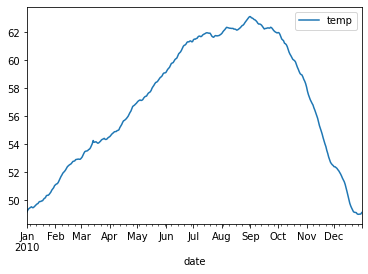

In [4]:
#resample by day 
#take the average temperature 
#plot distribution 
df.resample('D').mean().plot()

<AxesSubplot:xlabel='date'>

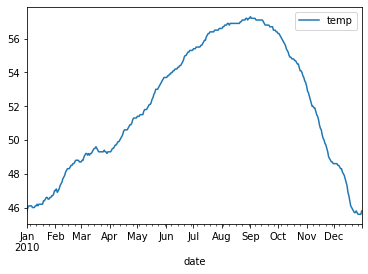

In [5]:
###Write the code necessary to visualize the minimum temperature over time.
#minimum temperature per day 
df.resample('D').min().plot()

<AxesSubplot:xlabel='date'>

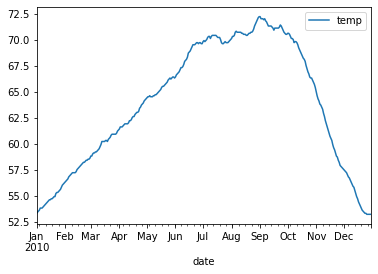

In [6]:
###Write the code necessary to visualize the maximum temperature over time. 
#maximum temperature per day 
df.resample('D').max().plot()

In [7]:
###Which month is the coldest, (on average) temperature? 
df.resample('M').mean().temp.sort_values()

date
2010-01-31    49.984140
2010-12-31    50.498253
2010-02-28    52.243899
2010-03-31    53.956528
2010-11-30    55.185139
2010-04-30    55.633056
2010-05-31    57.970968
2010-10-31    60.253091
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
Name: temp, dtype: float64

In [8]:
###Which month has the highest average temperature? 
#September has the highest average temperature 
df.resample('M').mean().temp.sort_values(ascending=False)

date
2010-09-30    62.487083
2010-08-31    62.405376
2010-07-31    61.765457
2010-06-30    60.444722
2010-10-31    60.253091
2010-05-31    57.970968
2010-04-30    55.633056
2010-11-30    55.185139
2010-03-31    53.956528
2010-02-28    52.243899
2010-12-31    50.498253
2010-01-31    49.984140
Name: temp, dtype: float64

### Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [9]:
#resample by the day, only storing minimum values per day 
daily = df.temp.resample('D').agg(['min', 'max'])
daily.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [11]:
#which month has the highest daily temperature variability? 
#create a new column for daily temp_diff that hold the difference between max temperatures and minimum temperatures
daily['temp_diff'] = daily['max'] - daily['min']
#create a column for month that includes the month 
daily['month'] = daily.index.strftime('%m-%b')
#groupby month, requesting the maximum temperature difference 
daily.groupby('month').temp_diff.max().sort_values()

month
12-Dec     8.9
01-Jan     9.3
02-Feb     9.9
11-Nov    11.8
03-Mar    12.0
04-Apr    13.0
05-May    13.1
10-Oct    14.4
06-Jun    14.8
07-Jul    14.8
09-Sep    14.9
08-Aug    15.0
Name: temp_diff, dtype: float64

- August has the highest daily temperature variability

### Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

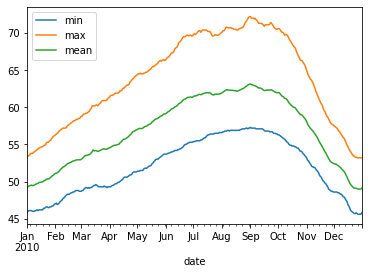

In [12]:
### max, min, mean on the same line 
#specify dataframe.column.resample(time period to resample on).agg(what you want to agg on divided by columns).plot
df.temp.resample('D').agg(['min', 'max', 'mean']).plot()

### Seattle Precipitation 

In [13]:
from vega_datasets import data
temps = data.seattle_weather()

In [14]:
#reset index to date/time 
seattle_weather = temps.set_index('date').sort_index()
seattle_weather.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [48]:
#create year, month, and day columns 
seattle_weather['year'] = seattle_weather.index.year 
seattle_weather['month'] = seattle_weather.index.month 
seattle_weather['day'] = seattle_weather.index.day 
seattle_weather.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day,sunny
date,,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,2012,1,1,False
2012-01-02,10.90,10.60,2.80,4.50,rain,2012,1,2,False
2012-01-03,0.80,11.70,7.20,2.30,rain,2012,1,3,False
2012-01-04,20.30,12.20,5.60,4.70,rain,2012,1,4,False
2012-01-05,1.30,8.90,2.80,6.10,rain,2012,1,5,False


### Which year and month combination has the highest precipitation

In [19]:
#resample by month 
#write the column you want to examine in this case precipitation 
#write the math option you want i.e. .sum .max .min etc ()
# .sort_values()
#.tail()
seattle_weather.resample('M').precipitation.sum().sort_values().tail()

date
2012-03-31    183.0
2012-11-30    210.5
2015-11-30    212.6
2014-03-31    240.0
2015-12-31    284.5
Name: precipitation, dtype: float64

- December 2015 had the highest precipitation 

### Visualize the amount of monthly precipitation over time 

year
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2013    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
Name: precipitation, dtype: object

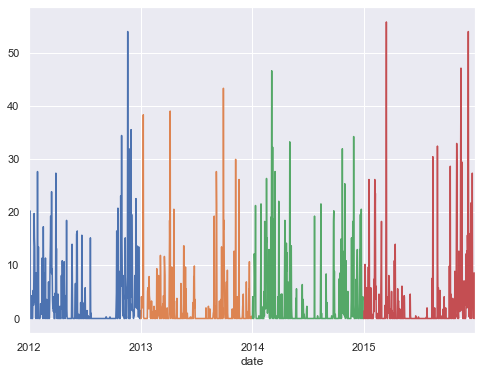

In [50]:
seattle_weather.groupby('year').precipitation.plot()

<AxesSubplot:title={'center':'Monthly Precipitation Totals'}, xlabel='date'>

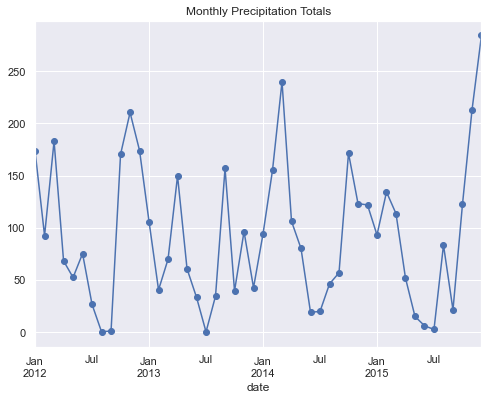

In [51]:
seattle_weather.resample('M').precipitation.sum().plot(marker='o', title = 'Monthly Precipitation Totals')

### Visualize the Amount of Wind over time 

<AxesSubplot:title={'center':'Monthly Wind Totals'}, xlabel='date'>

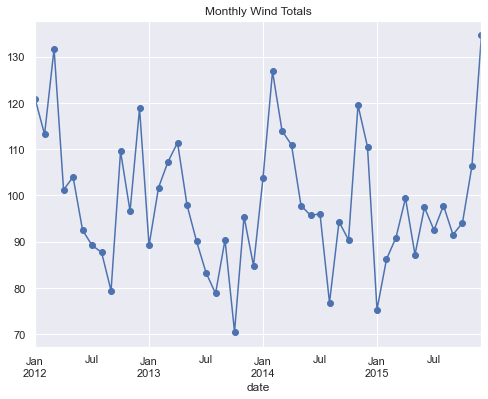

In [52]:
seattle_weather.resample('M').wind.sum().plot(marker='o', title = 'Monthly Wind Totals')

### Which year month combination is the windiest 

In [53]:

seattle_weather.resample('M').wind.mean().sort_values().tail()

date
2012-02-29   3.90
2014-11-30   3.98
2012-03-31   4.25
2015-12-31   4.34
2014-02-28   4.53
Name: wind, dtype: float64

- Windiest year/month comination: February 2014 

### Which year was the sunniest? 


In [55]:
#create a column with a boolean mask to identify only the days that have the specific value 
seattle_weather['sunny'] = seattle_weather.weather == 'sun'
seattle_weather.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day,sunny
date,,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,2012,1,1,False
2012-01-02,10.90,10.60,2.80,4.50,rain,2012,1,2,False
2012-01-03,0.80,11.70,7.20,2.30,rain,2012,1,3,False
2012-01-04,20.30,12.20,5.60,4.70,rain,2012,1,4,False
2012-01-05,1.30,8.90,2.80,6.10,rain,2012,1,5,False


In [56]:
#first dataframe 
#the groupby function is used to aggregate the years in 'year column'
#the mean is taken 
#values are sorted to find the highest year 
seattle_weather.groupby('year').sunny.mean().sort_values()

year
2012   0.32
2015   0.49
2013   0.56
2014   0.58
Name: sunny, dtype: float64

- 2014 was the sunniest year 

### In which month does it rain the most?

In [59]:
seattle_weather.groupby('month').precipitation.mean().sort_values()

month
7    0.39
6    1.11
8    1.32
5    1.67
9    1.96
4    3.13
2    3.73
1    3.76
10   4.06
3    4.89
12   5.02
11   5.35
Name: precipitation, dtype: float64

- It rains the most in November 

### Which month has the most number of days with a non-zero amount of precipitation?

In [60]:
seattle_weather.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day,sunny
date,,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,2012,1,1,False
2012-01-02,10.90,10.60,2.80,4.50,rain,2012,1,2,False
2012-01-03,0.80,11.70,7.20,2.30,rain,2012,1,3,False
2012-01-04,20.30,12.20,5.60,4.70,rain,2012,1,4,False
2012-01-05,1.30,8.90,2.80,6.10,rain,2012,1,5,False


In [61]:
seattle_weather['rain'] = seattle_weather.precipitation > 0
seattle_weather.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day,sunny,rain
date,,,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,2012,1,1,False,False
2012-01-02,10.90,10.60,2.80,4.50,rain,2012,1,2,False,True
2012-01-03,0.80,11.70,7.20,2.30,rain,2012,1,3,False,True
2012-01-04,20.30,12.20,5.60,4.70,rain,2012,1,4,False,True
2012-01-05,1.30,8.90,2.80,6.10,rain,2012,1,5,False,True


In [64]:
seattle_weather.groupby('month').rain.sum().sort_values()

month
7     11
8     22
5     34
9     35
6     37
4     59
10    61
1     66
11    71
2     73
3     73
12    81
Name: rain, dtype: int64

- December has the most number of days with non-zero precipitation

# Flights Data 

In [65]:
flights = data.flights_20k()
flights

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [66]:
#reset index to date/time 
df = flights.set_index('date').sort_index()
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### Convert any negative delays to 0.

In [67]:
df.delay = df.delay.clip(lower = 0)
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### Which hour of the day has the highest average delay?

In [68]:
df['hour'] = df.index.hour
df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [69]:
df.groupby('hour').delay.mean().sort_values()

hour
5      0.51
6      2.49
7      3.07
8      4.03
9      5.00
10     5.85
11     7.36
12     9.21
14    10.75
13    11.45
15    13.14
17    13.20
16    13.88
18    14.51
19    16.26
20    17.89
21    21.63
22    32.70
23    65.35
0    127.92
1    170.00
3    302.50
Name: delay, dtype: float64

- 3 am has the highest delay 

### Does the day of the week make a difference in the delay amount?

In [70]:
df['day'] = df.index.day_name()
df.head()

,delay,distance,origin,destination,hour,day
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday


In [71]:
df.groupby('day').delay.mean().sort_values()

day
Monday       7.17
Saturday     8.43
Tuesday      9.41
Sunday      10.41
Wednesday   11.03
Thursday    12.82
Friday      17.76
Name: delay, dtype: float64

- Fridays have the highest number of delays 
- Mondays have the least number of delays 

### Does the month make a difference in the delay amount?

In [73]:
df['month'] = df.index.month_name()
df.head()

,delay,distance,origin,destination,hour,day,month
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday,January
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday,January
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday,January
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday,January
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday,January


In [74]:
df.groupby('month').delay.mean().sort_values()

month
March       9.88
January    11.30
February   12.31
Name: delay, dtype: float64

- The month makes a difference in the number of delays 